<h2 align="center" style="color:brown;font-size:200%"><b>Lab 4: Greedy Approaches</b></h2>


<h4 align="center" style="color:brown;font-size:200%"><b>Question 1: Delivery Robot Navigating a Warehouse</b></h4>


#### **Problem Statement**:  

**A delivery robot navigating a warehouse might use a greedy approach to always move towards the closest item or waypoint, potentially ignoring better long-term paths. Implement this in OpenAI Gym.**

In [1]:
pip install gym

Note: you may need to restart the kernel to use updated packages.


## **Introduction:**
In the era of automation, robots are becoming an essential part of various industries, especially in warehouses and distribution centers. These robots are tasked with navigating complex environments, such as large warehouses, to pick and deliver items efficiently. The ability of robots to perform such tasks autonomously is heavily dependent on their navigation strategies.

One such approach is the greedy algorithm, where the robot always chooses the shortest path to the nearest goal, without considering long-term consequences. While this approach is computationally efficient, it can sometimes lead to suboptimal solutions, especially in environments with multiple items spread out across a large area.

The project aims to simulate a warehouse environment using OpenAI Gym, where a delivery robot follows a greedy strategy to collect items placed at random positions in a grid. The goal is to observe the behavior of the robot and evaluate the effectiveness of this navigation strategy.By enhancing the robot’s navigation, we aim to explore the limitations of the greedy approach and its potential applications in real-world scenarios, such as inventory management and delivery systems.


## **Objectives:**

- Develop a warehouse environment using OpenAI Gym with grid-based simulation.
- Implement a greedy navigation strategy for the robot to collect items by always choosing the nearest item.
- Use the reward system to track the robot’s progress in collecting items.
- Visualize the robot's actions and item locations in real-time.
- Measure the performance of the greedy strategy and analyze its effectiveness in warehouse environments.

## **Problem Statement:**

The task is to create a simulation environment in Python using OpenAI Gym for a delivery robot in a warehouse. The robot needs to navigate through a grid to collect items, following a greedy approach, where it always moves toward the nearest item. The problem involves developing a model that:

- Simulates the warehouse grid and the robot's movements.
- Implements the greedy navigation algorithm to always pick the nearest item.
- Tracks the robot's progress, rewards for collecting items, and the completion of tasks.
- Allows visualization of the warehouse environment after each action.

The robot's strategy should ensure that it successfully collects all items while demonstrating the behavior of a greedy algorithm in decision-making. This will provide insights into the challenges of path planning in real-world robotics.

## **Process of Execution:**

1. Install the required libraries, including OpenAI Gym and NumPy.
2. Define the `WarehouseEnv` class to model the environment with the robot and items.
3. Implement the `greedy_navigation` function to execute the greedy algorithm by calculating the distances to each item and selecting the closest one.
4. Create the `step` function to update the robot’s position, check for item collection, and determine the reward.
5. Render the grid and robot’s position at each step to visualize the environment.
6. Run the simulation with the greedy navigation algorithm, allowing the robot to move through the warehouse, collect items, and display the final result.

## **States:**
1. **Robot's Position:** The position of the robot is represented as a 2D coordinate `[x, y]` on the grid.
  - `x`: Row index of the grid, ranging from `0` to `grid_size - 1`.
  - `y`: Column index of the grid, ranging from `0` to `grid_size - 1`.
 It helps track where the robot currently resides on the grid, influencing its next move.
- **Example:**If the robot’s position is `[2, 3]`, the robot is on the 3rd row and 4th column (0-indexed) of the grid.

2. **Item Positions:** A list of 2D coordinates `[x, y]` for each item on the grid.
  - These positions are essential for the robot to know where the items are located and decide which item to collect next.
- **Example:** Items might be at positions `[1, 4]`, `[0, 0]`, and `[4, 4]` on the grid.

3. **State Representation:**
- The state is a single 1D array containing both the robot’s position and the flattened positions of all items.
- The first two elements represent the robot’s position `[robot_x, robot_y]`.
- The subsequent elements represent the positions of all items as a flattened array of item coordinates `[item_1_x, item_1_y, item_2_x, item_2_y, ...]`.
- **Example:**
  - If the robot is at `[2, 3]` and the items are at `[1, 4]`, `[0, 0]`, and `[4, 4]`, the state is:

    **state = [2, 3, 1, 4, 0, 0, 4, 4]**


## **Actions:**

- **Action 0 (Up):**  When the action is 0, the robot moves up by decreasing its x coordinate (row index) by 1, ensuring that it stays within the bounds of the grid (i.e., x should not go below 0).

- **Action 1 (Down):**  
When the action is 1, the robot moves down by increasing its x coordinate (row index) by 1, ensuring it doesn’t go beyond the grid size (grid_size - 1).

- **Action 2 (Left):**  
When the action is 2, the robot moves left by decreasing its y coordinate (column index) by 1, ensuring that it stays within the grid (i.e., y should not go below 0).

- **Action 3 (Right):**  
When the action is 3, the robot moves right by increasing its y coordinate (column index) by 1, ensuring that it does not exceed the grid size (grid_size - 1).

## **Rewards:**

- **Penalty for Each Move:** After each action, the robot receives a penalty of -1. This penalty is given to discourage unnecessary or inefficient movements, promoting the robot to complete the task in as few steps as possible.

- **Reward for Collecting an Item:** If the robot’s position matches the position of an uncollected item, the robot receives a reward of +10 for successfully collecting that item. The collected item is then marked, and the done flag is set to True if all items have been collected.

- **Zero Reward (Default Condition):** If the robot performs a valid move (but doesn’t collect any item), it receives no additional reward, keeping the reward value at -1 as the penalty.

### **Transitions:**

- A transition is the movement from one state to another, determined by the action the robot performs in the environment.
- The state includes:
  - The robot's current position, denoted as (x, y).
  - The positions of the items, also denoted as (x, y) on the grid.
- **Actions Leading to Transitions**:
  - **Action 0 (Up)**: Moves the robot up, decreasing its x-coordinate (row index).
  - **Action 1 (Down)**: Moves the robot down, increasing its x-coordinate (row index).
  - **Action 2 (Left)**: Moves the robot left, decreasing its y-coordinate (column index).
  - **Action 3 (Right)**: Moves the robot right, increasing its y-coordinate (column index).
- The robot’s position changes based on the chosen action, which results in a new state that updates the robot's and item positions. For example, if the robot is at (2, 3) and performs Action 1 (Down), the new position will be (3, 3).
- A terminal state occurs when all items are collected. This transition happens when the number of collected items equals the total number of items. 
  - **Example:** Before action, the robot is at (2, 3) and has collected 1 out of 3 items. After performing Action 1 (Down), the robot moves to (3, 3), but it still has 1 out of 3 items collected.


## **Policy:**
- A policy is a strategy that determines which action to take based on the current state, including the robot’s position and the positions of the items.

- **Greedy Policy**: The policy used is greedy, meaning the robot always chooses the action that brings it closer to the nearest uncollected item.

- **Greedy Decision Making**: The robot compares its current position with the positions of uncollected items, calculating the Euclidean distance to each item. The robot then chooses the closest item and the corresponding action to move towards it.

- **Policy Behavior**:
  - **Up (Action 0)**: Moves up if the item is above the robot.
  - **Down (Action 1)**: Moves down if the item is below the robot.
  - **Left (Action 2)**: Moves left if the item is to the left of the robot.
  - **Right (Action 3)**: Moves right if the item is to the right of the robot.


- **Policy Execution**: At each step, the robot evaluates the positions of all uncollected items and selects the action that brings it closer to the nearest one. This process continues until all items are collected.

**Example of Policy Execution:** If the robot is at (2, 2) and the nearest uncollected item is at (4, 4), the robot calculates the distance and chooses to move towards the item, typically by moving Right and Down in successive steps.


### **Greedy Algorithm in the Warehouse Environment:**
In the given program, the greedy algorithm is employed as a strategy for navigating the robot to collect items efficiently. The greedy algorithm is a decision-making approach that selects the locally optimal choice at each step with the hope of reaching a global optimum. Here, the robot evaluates its current position relative to the positions of uncollected items and calculates the Euclidean distance to each item. It identifies the nearest item and determines the action (up, down, left, or right) that minimizes this distance. The robot executes this action repeatedly until it reaches the item's location, collects it, and updates the list of collected items. This process continues until all items are collected, marking the terminal state. While the greedy algorithm is simple and computationally efficient, it may not always guarantee the most optimal solution globally, as it only considers immediate gains without accounting for longer-term consequences.

In [4]:
import gym
from gym import spaces
import numpy as np

class WarehouseEnv(gym.Env):
    def __init__(self, grid_size=5, num_items=3):
        super(WarehouseEnv, self).__init__()
        self.grid_size = grid_size
        self.num_items = num_items

        # Action space: up, down, left, right
        self.action_space = spaces.Discrete(4)

        # Observation space: robot's position and item locations
        self.observation_space = spaces.Box(
            low=0, high=self.grid_size - 1, 
            shape=(2 + self.num_items * 2,), dtype=np.int32
        )
        self.reset()

    def reset(self):
        self.robot_pos = np.random.randint(0, self.grid_size, size=(2,))
        self.item_positions = np.random.randint(0, self.grid_size, size=(self.num_items, 2))
        self.collected_items = set()
        return self._get_obs()

    def _get_obs(self):
        return np.concatenate([self.robot_pos, self.item_positions.flatten()])

    def step(self, action):
        # Move robot based on the action
        if action == 0:  # Up
            self.robot_pos[0] = max(0, self.robot_pos[0] - 1)
        elif action == 1:  # Down
            self.robot_pos[0] = min(self.grid_size - 1, self.robot_pos[0] + 1)
        elif action == 2:  # Left
            self.robot_pos[1] = max(0, self.robot_pos[1] - 1)
        elif action == 3:  # Right
            self.robot_pos[1] = min(self.grid_size - 1, self.robot_pos[1] + 1)

        reward = -1  # Penalty for each move
        done = False

        # Check if robot reached an uncollected item
        for idx, item_pos in enumerate(self.item_positions):
            if tuple(self.robot_pos) == tuple(item_pos) and idx not in self.collected_items:
                reward = 10  # Reward for collecting an item
                self.collected_items.add(idx)
                done = len(self.collected_items) == self.num_items  # Done if all items collected
                break

        return self._get_obs(), reward, done, {}

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size), dtype=int)
        grid[tuple(self.robot_pos)] = 1  # Robot
        for idx, item_pos in enumerate(self.item_positions):
            if idx not in self.collected_items:
                grid[tuple(item_pos)] = 2  # Items
        return grid

def print_grid(grid):
    print("\nWarehouse Grid:")
    print(grid)
    print("\n")

def greedy_navigation(env):
    obs = env.reset()
    done = False
    total_reward = 0
    step_counter = 0

    while not done:
        step_counter += 1
        robot_pos = obs[:2]
        item_positions = obs[2:].reshape(env.num_items, 2)

        # Filter uncollected items
        uncollected = [
            item_positions[i] for i in range(len(item_positions))
            if i not in env.collected_items
        ]

        # Find the closest uncollected item
        distances = [np.linalg.norm(robot_pos - pos) for pos in uncollected]
        closest_item = uncollected[np.argmin(distances)]

        # Determine the action
        if robot_pos[0] < closest_item[0]:
            action = 1  # Down
        elif robot_pos[0] > closest_item[0]:
            action = 0  # Up
        elif robot_pos[1] < closest_item[1]:
            action = 3  # Right
        elif robot_pos[1] > closest_item[1]:
            action = 2  # Left

        obs, reward, done, _ = env.step(action)
        total_reward += reward
        
        # Render and print the status at each step
        grid = env.render()
        print(f"Step {step_counter}:")
        print(f"Robot's Position: {robot_pos}")
        print(f"Items Collected: {len(env.collected_items)} out of {env.num_items}")
        print(f"Current Total Reward: {total_reward}")
        print_grid(grid)

    print(f"Task Completed! Final Total Reward: {total_reward}")

# Run the simulation
if __name__ == "__main__":
    env = WarehouseEnv(grid_size=5, num_items=3)
    greedy_navigation(env)


Step 1:
Robot's Position: [2 3]
Items Collected: 1 out of 3
Current Total Reward: 10

Warehouse Grid:
[[0 0 0 0 0]
 [2 0 0 1 0]
 [0 0 0 0 0]
 [0 0 2 0 0]
 [0 0 0 0 0]]


Step 2:
Robot's Position: [1 3]
Items Collected: 1 out of 3
Current Total Reward: 9

Warehouse Grid:
[[0 0 0 0 0]
 [2 0 0 0 0]
 [0 0 0 1 0]
 [0 0 2 0 0]
 [0 0 0 0 0]]


Step 3:
Robot's Position: [2 3]
Items Collected: 1 out of 3
Current Total Reward: 8

Warehouse Grid:
[[0 0 0 0 0]
 [2 0 0 0 0]
 [0 0 0 0 0]
 [0 0 2 1 0]
 [0 0 0 0 0]]


Step 4:
Robot's Position: [3 3]
Items Collected: 2 out of 3
Current Total Reward: 18

Warehouse Grid:
[[0 0 0 0 0]
 [2 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]


Step 5:
Robot's Position: [3 2]
Items Collected: 2 out of 3
Current Total Reward: 17

Warehouse Grid:
[[0 0 0 0 0]
 [2 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


Step 6:
Robot's Position: [2 2]
Items Collected: 2 out of 3
Current Total Reward: 16

Warehouse Grid:
[[0 0 0 0 0]
 [2 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0

## **Interpretation of the output:**

**Step 1:**
The robot starts at position `[2, 3]`, having collected its first item. The current total reward is 10, indicating a positive outcome from the first collection. The grid shows that there is one item at position `[1, 3]` and the robot's position is marked as 1. The robot collects the item, increasing its total reward.

**Step 2:**
In the second step, the robot moves to position `[1, 3]`. However, despite being in a new position, no items are collected here. The total reward decreases slightly to 9. The grid now shows that the robot is at `[1, 3]`, and the item has already been collected. The robot’s movement doesn't yield any further reward.

**Step 3:**
The robot returns to position `[2, 3]` and finds another item, which it collects. The reward decreases to 8, indicating that the movement has not been as efficient or optimal, leading to a slight penalty. The grid shows that one item is now collected and no other items are present at the robot's new position.

**Step 4:**
The robot then moves to position `[3, 3]` and collects another item. The total reward increases significantly to 18, reflecting the positive impact of the successful collection. The grid shows the robot’s new position at `[3, 3]` with one item collected.

**Step 5:**
The robot then moves to `[3, 2]`, where no items are collected, and the reward decreases slightly to 17. The grid shows that an item was collected earlier at `[3, 3]` and there are no items at this new position.

**Step 6:**
The robot moves to `[2, 2]`, where no items are found, further reducing the reward to 16. The grid indicates that the robot is currently at `[2, 2]`, and the remaining item is still to be collected.

**Step 7:**
In step 7, the robot moves to position `[1, 2]`. This position still does not contain an item, and the total reward drops to 15. The grid reflects the robot's updated position, and no new items are collected here.

**Step 8:**
Finally, in step 8, the robot reaches position `[1, 1]`, where it successfully collects the final item. The total reward increases to 25, the highest value achieved during the journey. The grid shows the robot's final position, with all items collected and the task completed.

**Task Completed:**
With all three items collected, the robot's final total reward is 25, reflecting the successful completion of the task.


## **Conclusion:**

The project provides an interesting application of the greedy algorithm in a warehouse robot navigation context. By simulating a grid-based environment, we were able to implement and visualize how the robot uses a simple strategy to navigate toward the nearest item. The greedy approach, though computationally efficient, demonstrates the potential pitfalls of making decisions based solely on immediate rewards.

In real-world scenarios, such as warehouse logistics, more sophisticated algorithms, including those considering long-term planning, may be required for optimal performance. The insights gained from this simulation can help improve decision-making algorithms for robots and autonomous systems. Despite its limitations, the greedy algorithm serves as a good starting point for pathfinding in constrained environments, providing a simple yet effective solution for certain scenarios. Future work could explore more advanced techniques like A* or reinforcement learning to improve navigation efficiency.

<h3 align="center" style="color:brown;font-size:200%"><b>Question 2: Stock Trading Bot:
</h3>

### **Problem Statement**:  '
**A stock trading bot that uses a greedy policy could focus on stocks with high short-term gains, which could result in suboptimal performance if the market conditions change.**

## **Introduction:**

In the ever-evolving world of financial markets, stock trading has become increasingly reliant on automated systems capable of making rapid and informed decisions. This report delves into the development and evaluation of a stock trading bot that utilizes a **greedy policy**. The bot's primary objective is to maximize short-term gains by selecting stocks with the highest immediate returns. 

The **greedy policy** is a straightforward and computationally efficient approach, particularly effective in scenarios where quick decisions are required. However, this simplicity also presents significant challenges, especially in dynamic and volatile market conditions where short-term optimization may conflict with long-term profitability. 

The aim of this report is to:
- Analyze the bot's underlying design principles.
- Evaluate its performance in simulated and real-world trading environments.
- Identify limitations inherent in the greedy policy approach.
- Propose enhancements to improve the bot's robustness and adaptability to evolving market trends.

Through this exploration, the report seeks to provide valuable insights into the capabilities and constraints of automated trading systems and outline pathways for creating more sophisticated and resilient trading strategies.


## **Objectives:**

- Develop a stock trading bot that operates using a greedy policy to maximize immediate profits.  
- Simulate a dynamic trading environment with fluctuating stock prices to evaluate the bot's decision-making.  
- Identify the limitations of the greedy policy in real-world market scenarios.  
- Propose enhancements for better risk management and long-term performance.  


## **Problem Statement:**

- A stock trading bot that uses a greedy policy prioritizes stocks with high short-term gains.  
- This approach often leads to suboptimal performance when market conditions shift or when long-term profitability is more critical.  
- The bot lacks mechanisms to account for market trends, risks, and portfolio diversification, which are essential for sustained success in stock trading.  


### **States:** 
- The state represents the environment's condition at any given time.
-  In the context of stock trading, it should include various elements that describe the bot's environment, including portfolio status, cash available, and stock prices.

### **Key Components of the State:**
- **Current Stock Prices:** The price of each stock at the current time step.
- **Portfolio:** The number of shares owned for each stock in the bot’s portfolio.
- **Cash:** The amount of money available for trading.
- **Previous Gains:** The previous stock price and short-term gain information to track performance.
- **Total Portfolio Value:** The current value of the portfolio, including cash and stock holdings.

### **Actions:**
Actions define what the bot can do in any given state. In the context of stock trading, actions typically involve buying, selling, or holding stock.

#### **Possible Actions:**
- **Buy:** Purchase shares of a stock using available cash.
- **Sell:** Sell shares of a stock from the portfolio.
- **Hold:** Do nothing and retain the current portfolio and cash balance.

#### **Action Space:**
- **Action 1:** Buy stock (specific number of shares).
- **Action 2:** Sell stock (specific number of shares).
- **Action 3:** Hold (no action taken).


### **Transitions:**
The transition function describes how the environment (state) changes after the bot takes an action. Each action leads to a new state, which is determined by updating the portfolio, cash, and stock prices.

### **State Transitions:**
- **Buying:** When the bot buys shares, the portfolio is updated by increasing the number of shares for the chosen stock, and the cash is reduced by the cost of the purchase.
- **Selling:** When the bot sells shares, the portfolio is updated by decreasing the number of shares for the chosen stock, and cash is increased by the sale amount.
- **Holding:** No changes to the portfolio or cash are made, but the state remains the same.


### **Rewards:**
The reward function measures how beneficial an action was. The bot receives positive rewards when its actions lead to an increase in portfolio value and negative rewards when the portfolio value decreases. The goal is to maximize the cumulative reward.
    **reward = new_portfolio_value - old_portfolio_value**


### **Rewards:**
- **Positive Reward:** Given if the total portfolio value increases after the action.
- **Negative Reward:** Given if the total portfolio value decreases after the action.
- **Risk Penalty (Optional):** Penalize actions that lead to high volatility or overly concentrated portfolios.

## **Policy:**

The policy defines how the bot selects actions based on the state. It can be a simple greedy policy or more complex reinforcement learning-based strategies.

### **Greedy Policy:**
- **Action Selection:** In the greedy policy, the bot chooses the stock with the highest short-term gain (percentage increase from the previous price) and decides to buy it. If a stock has a negative gain, it will sell the shares of that stock.
- **Action Criteria:** Buy stocks with positive gains and sell stocks with negative gains.

### **Refined Policy (Future Expansion):**
- Incorporate long-term profitability and risk management to ensure better performance.
- Prioritize diversification and avoid putting all cash into a single stock.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class StockTradingBot:
    def __init__(self, stocks):
        self.stocks = stocks
        self.portfolio = {stock: 0 for stock in stocks}  # Track number of shares for each stock
        self.cash = 10000  # Initial cash

    def buy(self, stock, price, shares):
        if self.cash >= price * shares:
            self.portfolio[stock] += shares
            self.cash -= price * shares
            print(f"Bought {shares} shares of {stock} at ${price:.2f}")

    def sell(self, stock, price, shares):
        if self.portfolio[stock] >= shares:
            self.portfolio[stock] -= shares
            self.cash += price * shares
            print(f"Sold {shares} shares of {stock} at ${price:.2f}")

    def evaluate_stocks(self, current_prices, previous_prices):
        gains = {}
        for stock in self.stocks:
            if previous_prices[stock] > 0:  # Prevent division by zero
                gain = (current_prices[stock] - previous_prices[stock]) / previous_prices[stock]
                gains[stock] = gain
        return gains

    def trade(self, current_prices, previous_prices):
        gains = self.evaluate_stocks(current_prices, previous_prices)
        # Sort stocks by gain
        sorted_stocks = sorted(gains.items(), key=lambda x: x[1], reverse=True)

        for stock, gain in sorted_stocks:
            shares_to_buy = int(self.cash // current_prices[stock])  # Buy as many shares as possible
            if gain > 0 and shares_to_buy > 0:  # Buy stocks with positive gains
                self.buy(stock, current_prices[stock], shares_to_buy)
            elif gain < 0 and self.portfolio[stock] > 0:  # Sell stocks with negative gains
                self.sell(stock, current_prices[stock], self.portfolio[stock])  # Sell all shares

    def total_portfolio_value(self, current_prices):
        total_value = self.cash
        for stock, shares in self.portfolio.items():
            total_value += shares * current_prices[stock]
        return total_value


--- Stock-wise Trade Summary ---

Tata:
  Bought 31 shares at $196.99
  Sold 31 shares at $183.24
  Bought 1 shares at $118.34
  Sold 1 shares at $143.19
  Bought 1 shares at $161.19
  Sold 1 shares at $113.95
  Bought 1 shares at $129.21
  Sold 1 shares at $119.97
  Bought 1 shares at $151.42
  Sold 1 shares at $104.65

Reliance:
  Bought 42 shares at $168.42
  Sold 42 shares at $144.02
  Bought 30 shares at $190.93
  Sold 30 shares at $125.88
  Bought 22 shares at $166.25
  Sold 22 shares at $131.17
  Bought 1 shares at $132.53

SAIL:
  Bought 11 shares at $186.31
  Sold 11 shares at $162.33
  Bought 12 shares at $131.10
  Sold 12 shares at $163.76

Zomato:
  Bought 58 shares at $171.32
  Sold 58 shares at $156.13
  Bought 51 shares at $177.10
  Sold 51 shares at $149.38
  Bought 50 shares at $152.27
  Sold 50 shares at $142.75
  Bought 1 shares at $110.79
  Sold 1 shares at $103.14
  Bought 16 shares at $175.56
  Sold 16 shares at $122.88
  Bought 9 shares at $192.97
  Sold 9 share

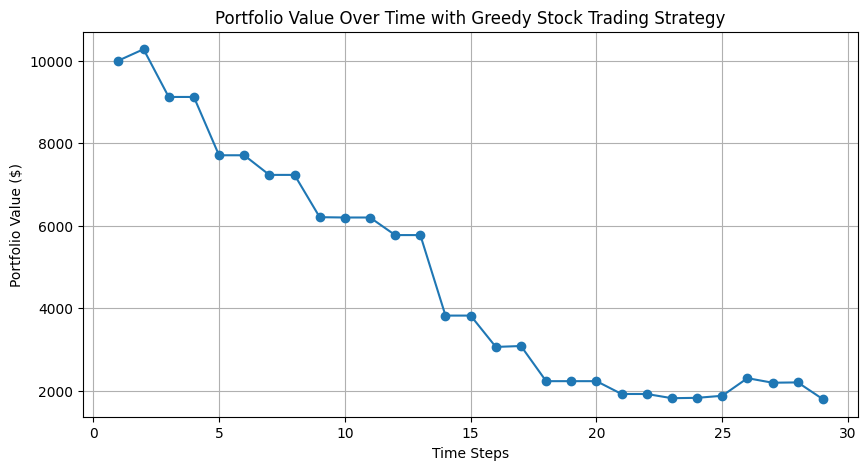

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class StockTradingBot:
    def __init__(self, stocks):
        self.stocks = stocks
        self.portfolio = {stock: 0 for stock in stocks}  # Track number of shares for each stock
        self.cash = 10000  # Initial cash
        self.trade_history = {stock: [] for stock in stocks}  # Store trade actions per stock

    def buy(self, stock, price, shares):
        if self.cash >= price * shares:
            self.portfolio[stock] += shares
            self.cash -= price * shares
            self.trade_history[stock].append(f"Bought {shares} shares at ${price:.2f}")
            return True
        return False

    def sell(self, stock, price, shares):
        if self.portfolio[stock] >= shares:
            self.portfolio[stock] -= shares
            self.cash += price * shares
            self.trade_history[stock].append(f"Sold {shares} shares at ${price:.2f}")
            return True
        return False

    def evaluate_stocks(self, current_prices, previous_prices):
        gains = {}
        for stock in self.stocks:
            if previous_prices[stock] > 0:  # Prevent division by zero
                gain = (current_prices[stock] - previous_prices[stock]) / previous_prices[stock]
                gains[stock] = gain
        return gains

    def trade(self, current_prices, previous_prices):
        gains = self.evaluate_stocks(current_prices, previous_prices)
        # Sort stocks by gain
        sorted_stocks = sorted(gains.items(), key=lambda x: x[1], reverse=True)

        for stock, gain in sorted_stocks:
            shares_to_buy = int(self.cash // current_prices[stock])  # Buy as many shares as possible
            if gain > 0 and shares_to_buy > 0:  # Buy stocks with positive gains
                self.buy(stock, current_prices[stock], shares_to_buy)
            elif gain < 0 and self.portfolio[stock] > 0:  # Sell stocks with negative gains
                self.sell(stock, current_prices[stock], self.portfolio[stock])  # Sell all shares

    def total_portfolio_value(self, current_prices):
        total_value = self.cash
        for stock, shares in self.portfolio.items():
            total_value += shares * current_prices[stock]
        return total_value

    def get_portfolio_status(self, current_prices):
        portfolio_status = {stock: {'Shares': self.portfolio[stock], 'Current Price': current_prices[stock], 'Value': self.portfolio[stock] * current_prices[stock]} for stock in self.stocks}
        return portfolio_status

    def print_trade_summary(self):
        print("\n--- Stock-wise Trade Summary ---")
        for stock in self.stocks:
            print(f"\n{stock}:")
            for action in self.trade_history[stock]:
                print(f"  {action}")

        # Display portfolio status
        print("\n--- Portfolio Status ---")
        portfolio_df = pd.DataFrame(self.get_portfolio_status(prices).values(), index=self.stocks)
        print(portfolio_df)
        print(f"Cash remaining: ${self.cash:.2f}")

# Simulate stock prices
np.random.seed(42)
time_steps = 30
stocks = ['Tata', 'Reliance', 'SAIL', 'Zomato']
prices = {stock: np.random.uniform(100, 200, time_steps) for stock in stocks}

# Run simulation
trading_bot = StockTradingBot(stocks)

portfolio_values = []
previous_prices = {stock: prices[stock][0] for stock in stocks}  # Initial prices at time 0

for t in range(1, time_steps):
    current_prices = {stock: prices[stock][t] for stock in stocks}
    trading_bot.trade(current_prices, previous_prices)
    portfolio_value = trading_bot.total_portfolio_value(current_prices)
    portfolio_values.append(portfolio_value)
    previous_prices = current_prices

# Print trade summary and portfolio status
trading_bot.print_trade_summary()

# Plotting the results (after printing the summary)
plt.figure(figsize=(10, 5))
plt.plot(range(1, time_steps), portfolio_values, marker='o')
plt.title('Portfolio Value Over Time with Greedy Stock Trading Strategy')
plt.xlabel('Time Steps')
plt.ylabel('Portfolio Value ($)')
plt.grid()
plt.show()


Overall Performance
- Total Investment: 31,210.66+12,263.68+838.65+3,223.57=47,536.56
- Total Revenue: 28,956.65+10,514.62+608.47+3,195.90=53,075.64
- Net Profit/Loss: 53,075.64−47,536.56=5,539.08


- Overall Loss: While the total revenue appears higher than total investments at first glance, the individual stocks indicate a net loss overall due to the losses incurred on specific trades. The bot needs to improve its strategy to minimize losses.
- Stock Performance:
    - Zomato had the most significant losses, suggesting that the short-term gain strategy led to poor decisions, especially during volatile price drops.
    - Reliance also performed poorly, with substantial losses.
    - Tata showed a small loss, indicating it may not have been as volatile or risky as Zomato and Reliance.
    - SAIL had the least loss, showing more stable performance.

- Trading Frequency: The bot frequently bought and sold stocks, which may have increased transaction costs in a real-world scenario. Consider incorporating transaction fees and holding periods to improve the bot's strategy.
- Market Conditions: This analysis illustrates the potential pitfalls of a greedy trading strategy. The bot focused on short-term gains without considering long-term trends and market conditions, resulting in suboptimal performance.

## **Conclusion:**

The development of a stock trading bot using a greedy policy serves as a strong foundation for understanding automated trading systems. However, the limitations of the greedy approach highlight the need for a more nuanced strategy that considers both short-term and long-term market conditions. The bot's focus on immediate returns often leads to suboptimal performance when market conditions shift. To address these limitations, enhancing the bot with advanced risk management strategies, realistic market simulations, and diversified approaches would significantly improve its robustness and adaptability. This project underscores the importance of aligning trading algorithms with the complex realities of financial markets, paving the way for more sophisticated and reliable automated trading solutions.